In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix

from pandas.plotting import scatter_matrix

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
data = pd.read_csv('Auto.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


There are 9 columns(features) in this dataset. The name column has text in it. All the other columns have numerical values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


There are 397 datapoints with no null values or missing values. horsepower and name are categorical variables. Remaining features are float and int values.

In [4]:
data.horsepower.value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
54      1
149     1
91      1
116     1
49      1
Name: horsepower, Length: 94, dtype: int64

horsepower has numerical values. Looks like there are some other special characters.

In [5]:
data.name.value_counts()

ford pinto         6
ford maverick      5
amc matador        5
toyota corolla     5
amc gremlin        4
                  ..
amc rebel sst      1
fiat 131           1
datsun 1200        1
ford mustang ii    1
plymouth champ     1
Name: name, Length: 304, dtype: int64

There are 304 different types of name objects.

In [6]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


The horsepower and name columns are categorical therefore they will not appear in the describe function. There are no missing values. All the features have 397 datapoints.

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'origin'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

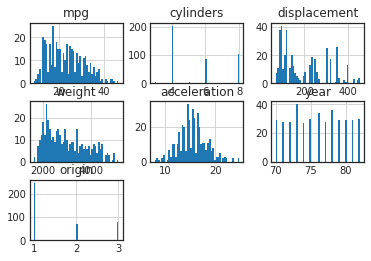

In [7]:
data.hist(bins=50)

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='cylinders', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='year', ylabel='mpg'>,
        <AxesSubplot:xlabel='origin', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='cylinders'>,
        <AxesSubplot:xlabel='cylinders', ylabel='cylinders'>,
        <AxesSubplot:xlabel='displacement', ylabel='cylinders'>,
        <AxesSubplot:xlabel='weight', ylabel='cylinders'>,
        <AxesSubplot:xlabel='acceleration', ylabel='cylinders'>,
        <AxesSubplot:xlabel='year', ylabel='cylinders'>,
        <AxesSubplot:xlabel='origin', ylabel='cylinders'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='cylinders', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
  

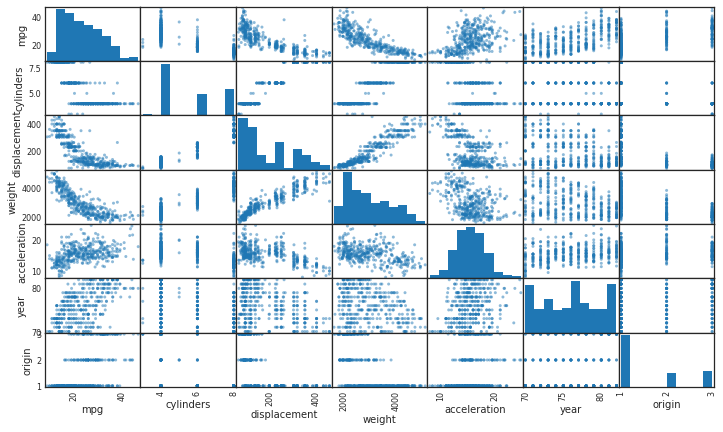

In [8]:
data_attributes = ['mpg', 'cylinders','displacement','weight','acceleration','year','origin']
scatter_matrix(data[data_attributes], figsize = (12,7))

Among the plots, we can see that mpg and displacement, mpg and weight show nonlinear relationship

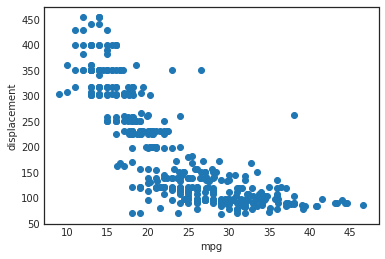

In [9]:
x= data['mpg']
y= data['displacement']
plt.scatter(x,y)
plt.xlabel('mpg')
plt.ylabel('displacement')
plt.show()

This looks like a non-linear relationship.

**Polynomial Regression**

In [10]:
X1 = PolynomialFeatures(1).fit_transform(data.mpg.values.reshape(-1,1))
X2 = PolynomialFeatures(2).fit_transform(data.mpg.values.reshape(-1,1))
X3 = PolynomialFeatures(3).fit_transform(data.mpg.values.reshape(-1,1))
X4 = PolynomialFeatures(4).fit_transform(data.mpg.values.reshape(-1,1))
X5 = PolynomialFeatures(5).fit_transform(data.mpg.values.reshape(-1,1))

yn = (data.displacement > 250).map({False:0, True:1}).values

yn

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,

In [11]:
fit_1 =  sm.GLS(data.displacement, X1).fit()
fit_2 =  sm.GLS(data.displacement, X2).fit()
fit_3 =  sm.GLS(data.displacement, X3).fit()
fit_4 =  sm.GLS(data.displacement, X4).fit()
fit_5 =  sm.GLS(data.displacement, X5).fit()

sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,395.0,1.522449e+06,0.0,NaN,NaN,NaN
1,394.0,9.606732e+05,1.0,561775.816199,258.063779,5.025159e-45
2,393.0,9.519097e+05,1.0,8763.462696,4.025685,4.549708e-02
3,392.0,8.947334e+05,1.0,57176.348337,26.265183,4.682282e-07
4,391.0,8.511630e+05,1.0,43570.342221,20.014972,1.008796e-05


Since the F value is pretty high and the p value is the least for the X4 model, it is the most important one.

In [12]:
X = X4

In [13]:
clf = sm.GLM(yn, X, family=sm.families.Binomial(sm.families.links.logit))
res = clf.fit()

<ipython-input-13-5e02a8418931>:1: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  clf = sm.GLM(yn, X, family=sm.families.Binomial(sm.families.links.logit))


In [14]:
mpg_grid = np.arange(data.mpg.min(), data.mpg.max()).reshape(-1,1)

In [15]:
X_test = PolynomialFeatures(4).fit_transform(mpg_grid)
pred = res.predict(X_test)

/home/poojanp/ml/my_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


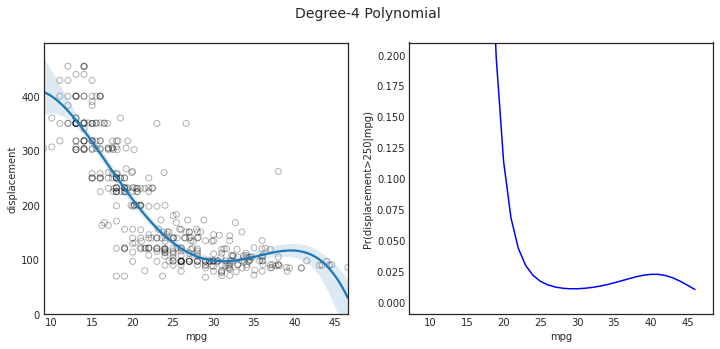

In [16]:
# creating plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Degree-4 Polynomial', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(data.mpg, data.displacement, facecolor='None', edgecolor='k', alpha=0.3)
sns.regplot(data.mpg, data.displacement, order = 4, truncate=True, scatter=False, ax=ax1)
ax1.set_ylim(ymin=0)

# Logistic regression showing Pr(wage>250) for the age range.
ax2.plot(mpg_grid, pred, color='b')

# Rug plot showing the distribution of wage>250 in the training data.
# 'True' on the top, 'False' on the bottom.
ax2.scatter(data.mpg, y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('mpg')
ax2.set_ylabel('Pr(displacement>250|mpg)');

The degree 4 polynomial model is represented in the above plot.

**Step Function**

In [17]:
df_cut, bins = pd.cut(data.mpg, 4, retbins=True, right=True)
df_cut.value_counts(sort=False)

(8.962, 18.4]    127
(18.4, 27.8]     151
(27.8, 37.2]     100
(37.2, 46.6]      19
Name: mpg, dtype: int64

In [18]:
df_steps = pd.concat([data.mpg, df_cut, data.displacement], keys=['mpg','mpg_cuts','displacement'], axis=1)
df_steps.head(5)

,mpg,mpg_cuts,displacement
0,18.0,"(8.962, 18.4]",307.0
1,15.0,"(8.962, 18.4]",350.0
2,18.0,"(8.962, 18.4]",318.0
3,16.0,"(8.962, 18.4]",304.0
4,17.0,"(8.962, 18.4]",302.0


In [19]:
# Create dummy variables for the age groups
df_steps_dummies = pd.get_dummies(df_steps['mpg_cuts'])

# Statsmodels requires explicit adding of a constant (intercept)
df_steps_dummies = sm.add_constant(df_steps_dummies)

df_steps_dummies.head(5)

,const,"(8.962, 18.4]","(18.4, 27.8]","(27.8, 37.2]","(37.2, 46.6]"
0,1.0,1,0,0,0
1,1.0,1,0,0,0
2,1.0,1,0,0,0
3,1.0,1,0,0,0
4,1.0,1,0,0,0


In [20]:
fit3 = sm.GLM(df_steps.displacement, df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1)).fit()
fit3.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
const,315.9843,5.095,62.021,0.000,305.999,325.970
"(18.4, 27.8]",-154.8021,6.913,-22.393,0.000,-168.351,-141.253
"(27.8, 37.2]",-211.1443,7.676,-27.507,0.000,-226.189,-196.099
"(37.2, 46.6]",-217.0369,14.123,-15.368,0.000,-244.717,-189.357


In [21]:
bin_mapping = np.digitize(mpg_grid.ravel(), bins)
bin_mapping

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [22]:
X_test2 = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis=1))
X_test2.head()

,const,2,3,4
0,1.0,0,0,0
1,1.0,0,0,0
2,1.0,0,0,0
3,1.0,0,0,0
4,1.0,0,0,0


In [23]:
pred2 = fit3.predict(X_test2)

In [24]:
clf2 = sm.GLM(yn, df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1),
              family=sm.families.Binomial(sm.families.links.logit))
res2 = clf2.fit()
pred3 = res2.predict(X_test2)

<ipython-input-24-0950ee6d1707>:2: DeprecationWarning: Calling Family(..) with a link class as argument is deprecated.
Use an instance of a link class instead.
  family=sm.families.Binomial(sm.families.links.logit))


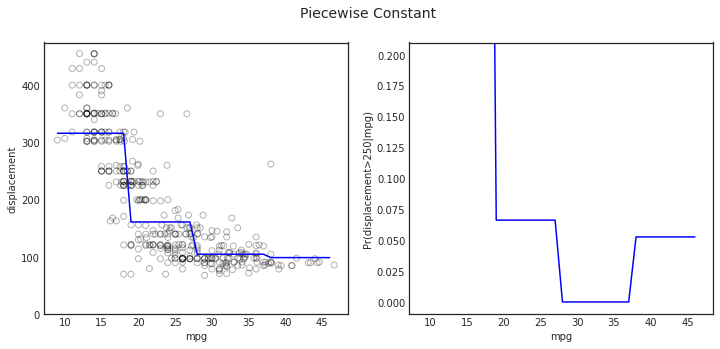

In [25]:
# creating plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(data.mpg, data.displacement, facecolor='None', edgecolor='k', alpha=0.3)
ax1.plot(mpg_grid, pred2, c='b')

ax1.set_xlabel('mpg')
ax1.set_ylabel('displacement')
ax1.set_ylim(ymin=0)

# Logistic regression showing Pr(wage>250) for the age range.
ax2.plot(np.arange(data.mpg.min(), data.mpg.max()).reshape(-1,1), pred3, color='b')

# Rug plot showing the distribution of wage>250 in the training data.
# 'True' on the top, 'False' on the bottom.
ax2.scatter(data.mpg, y/5, s=30, c='grey', marker='|', alpha=0.7)

ax2.set_ylim(-0.01,0.21)
ax2.set_xlabel('mpg')
ax2.set_ylabel('Pr(displacement>250|mpg)');

Using piecewise constant plot for the dataset.

**Splines**

In [26]:
# Cubic Splines
transformed_x = dmatrix("bs(data.mpg, knots=(10,15,20), degree=3, include_intercept=False)",
                        {"data.mpg": data.mpg}, return_type='dataframe')
fit4 = sm.GLM(data.displacement, transformed_x).fit()
pred4 = fit4.predict(dmatrix("bs(mpg_grid, knots=(10,15,20), degree=3, include_intercept=False)",
                             {"mpg_grid": mpg_grid}, return_type='dataframe'))
fit4.params

Intercept                                                                 304.000000
bs(data.mpg, knots=(10, 15, 20), degree=3, include_intercept=False)[0]      1.331772
bs(data.mpg, knots=(10, 15, 20), degree=3, include_intercept=False)[1]    116.101655
bs(data.mpg, knots=(10, 15, 20), degree=3, include_intercept=False)[2]     22.065762
bs(data.mpg, knots=(10, 15, 20), degree=3, include_intercept=False)[3]   -309.191583
bs(data.mpg, knots=(10, 15, 20), degree=3, include_intercept=False)[4]   -139.801239
bs(data.mpg, knots=(10, 15, 20), degree=3, include_intercept=False)[5]   -237.538243
dtype: float64

In [27]:
# Cubic Splines
transformed_x2 = dmatrix("bs(data.mpg, df=6, degree=3, include_intercept=False)",
                        {"data.mpg": data.mpg}, return_type='dataframe')
fit5 = sm.GLM(data.displacement, transformed_x2).fit()
pred5 = fit5.predict(dmatrix("bs(mpg_grid, df=6, degree=3, include_intercept=False)",
                             {"mpg_grid": mpg_grid}, return_type='dataframe'))
fit5.params

Intercept                                                   299.679394
bs(data.mpg, df=6, degree=3, include_intercept=False)[0]    153.366836
bs(data.mpg, df=6, degree=3, include_intercept=False)[1]    -39.415684
bs(data.mpg, df=6, degree=3, include_intercept=False)[2]   -163.731085
bs(data.mpg, df=6, degree=3, include_intercept=False)[3]   -211.535689
bs(data.mpg, df=6, degree=3, include_intercept=False)[4]   -190.719648
bs(data.mpg, df=6, degree=3, include_intercept=False)[5]   -216.541577
dtype: float64

In [28]:
# Natural Splines
transformed_x3 = dmatrix("cr(data.mpg, df=4)", {"data.mpg": data.mpg}, return_type='dataframe')
fit6 = sm.GLM(data.displacement, transformed_x3).fit()
pred6 = fit6.predict(dmatrix("cr(mpg_grid, df=4)", {"mpg_grid": mpg_grid}, return_type='dataframe'))
fit6.params

Intercept                165.191721
cr(data.mpg, df=4)[0]    300.164435
cr(data.mpg, df=4)[1]     -8.870368
cr(data.mpg, df=4)[2]    -62.952075
cr(data.mpg, df=4)[3]    -63.150271
dtype: float64

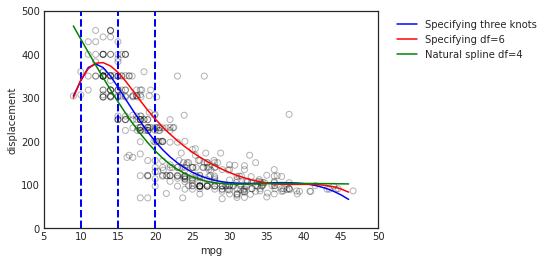

In [38]:
plt.scatter(data.mpg, data.displacement, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(mpg_grid, pred4, color='b', label='Specifying three knots')
plt.plot(mpg_grid, pred5, color='r', label='Specifying df=6')
plt.plot(mpg_grid, pred6, color='g', label='Natural spline df=4')
[plt.vlines(i , 0, 500, linestyles='dashed', lw=2, colors='b') for i in [10,15,20]]
plt.legend(bbox_to_anchor=(1.5, 1.0))
plt.xlim(5,50)
plt.ylim(0,500)
plt.xlabel('mpg')
plt.ylabel('displacement');

There is a nonlinear relationship between the mpg and displacement. This shows that the dataset does have non-linear relationships.